In [1]:
%run ./Australian_Housing_Price_Prediction_Utils.ipynb

## Data Understanding & Analysis

In [2]:
housing_df = pd.read_csv("train.csv")
housing_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [3]:
housing_df.shape

(1460, 81)

**ID column can be dropped as it is unique identifier to each row**

In [4]:
housing_df.drop(['Id'],inplace=True,axis=1)

In [5]:
housing_df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
1         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
2         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
3         Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
4         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     208500  
1       0      5    2007        WD         Normal     181500  
2       0      9    2008        WD         Normal     223500  
3       0      2    2006        WD        Abnorml     140000  
4       0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

In [6]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [7]:
housing_df.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315  ...   
std      30.202904     20.645407   181.066207   456.098091   161.319273  ...   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000  ...   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000  ...   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000  ...   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 37 columns]

### Missing Values 
    We will analyse and handle missing values post EDA

In [8]:
pd.set_option('display.max_rows', None)
missing_null_values = round(100*(housing_df.isnull().sum()/len(housing_df.index)),2).sort_values(ascending=False)
missing_null_values

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageYrBlt       5.55
GarageCond        5.55
GarageType        5.55
GarageFinish      5.55
GarageQual        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtCond          2.53
BsmtQual          2.53
BsmtFinType1      2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
MSSubClass        0.00
Fireplaces        0.00
Functional        0.00
KitchenQual       0.00
KitchenAbvGr      0.00
BedroomAbvGr      0.00
HalfBath          0.00
FullBath          0.00
BsmtHalfBath      0.00
TotRmsAbvGrd      0.00
GarageCars        0.00
GrLivArea         0.00
GarageArea        0.00
PavedDrive        0.00
WoodDeckSF        0.00
OpenPorchSF       0.00
EnclosedPorch     0.00
3SsnPorch         0.00
ScreenPorch       0.00
PoolArea          0.00
MiscVal           0.00
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleConditi

### Derived Column 
 Age of the house which is difference in year sold and year bought will be useful fature we will populate that and drop these variables

In [9]:
housing_df['Age_Of_House'] = housing_df['YrSold']-housing_df['YearBuilt']
housing_df.drop(['YrSold','YearBuilt'],axis=1,inplace=True)

## Exploratory Data Analysis

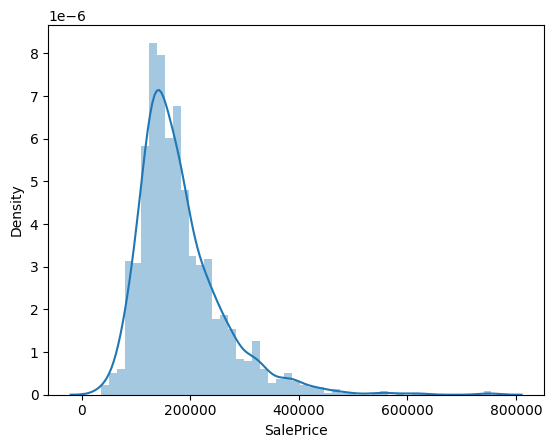

In [10]:
# Distribution of sale price
sns.distplot(housing_df['SalePrice']);

### Observation 
    Distribution seems to be slightly right skewed

Few Numeric type columns are categorical based on the description we will separate them out

In [11]:
house_numeric = housing_df.select_dtypes(include=['float64', 'int64'])
house_numeric.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'SalePrice', 'Age_Of_House'],
      dtype='object')

In [12]:
categorical_cols = ['MSSubClass','OverallQual','OverallCond','YearRemodAdd','BsmtFullBath','BsmtHalfBath','GarageYrBlt'
       ,'MoSold','Age_Of_House']

# We will drop categorical columns from it
house_numeric = house_numeric.drop(categorical_cols,axis=1)

In [13]:
house_numeric.head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0     8450       196.0         706           0        150   
1         80.0     9600         0.0         978           0        284   
2         68.0    11250       162.0         486           0        434   
3         60.0     9550         0.0         216           0        540   
4         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  ...  GarageCars  GarageArea  \
0          856       856       854             0  ...           2         548   
1         1262      1262         0             0  ...           2         460   
2          920       920       866             0  ...           2         608   
3          756       961       756             0  ...           3         642   
4         1145      1145      1053             0  ...           3         836   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0           0           61              0          0            0         0   
1         298            0              0          0            0         0   
2           0           42              0          0            0         0   
3           0           35            272          0            0         0   
4         192           84              0          0            0         0   

   MiscVal  SalePrice  
0        0     208500  
1        0     181500  
2        0     223500  
3        0     140000  
4        0     250000  

[5 rows x 27 columns]

In [14]:
sub_categorical_cols = ['MSSubClass','OverallQual','OverallCond','Utilities','GarageCond','SaleType','SaleCondition']

### Categorical Columns

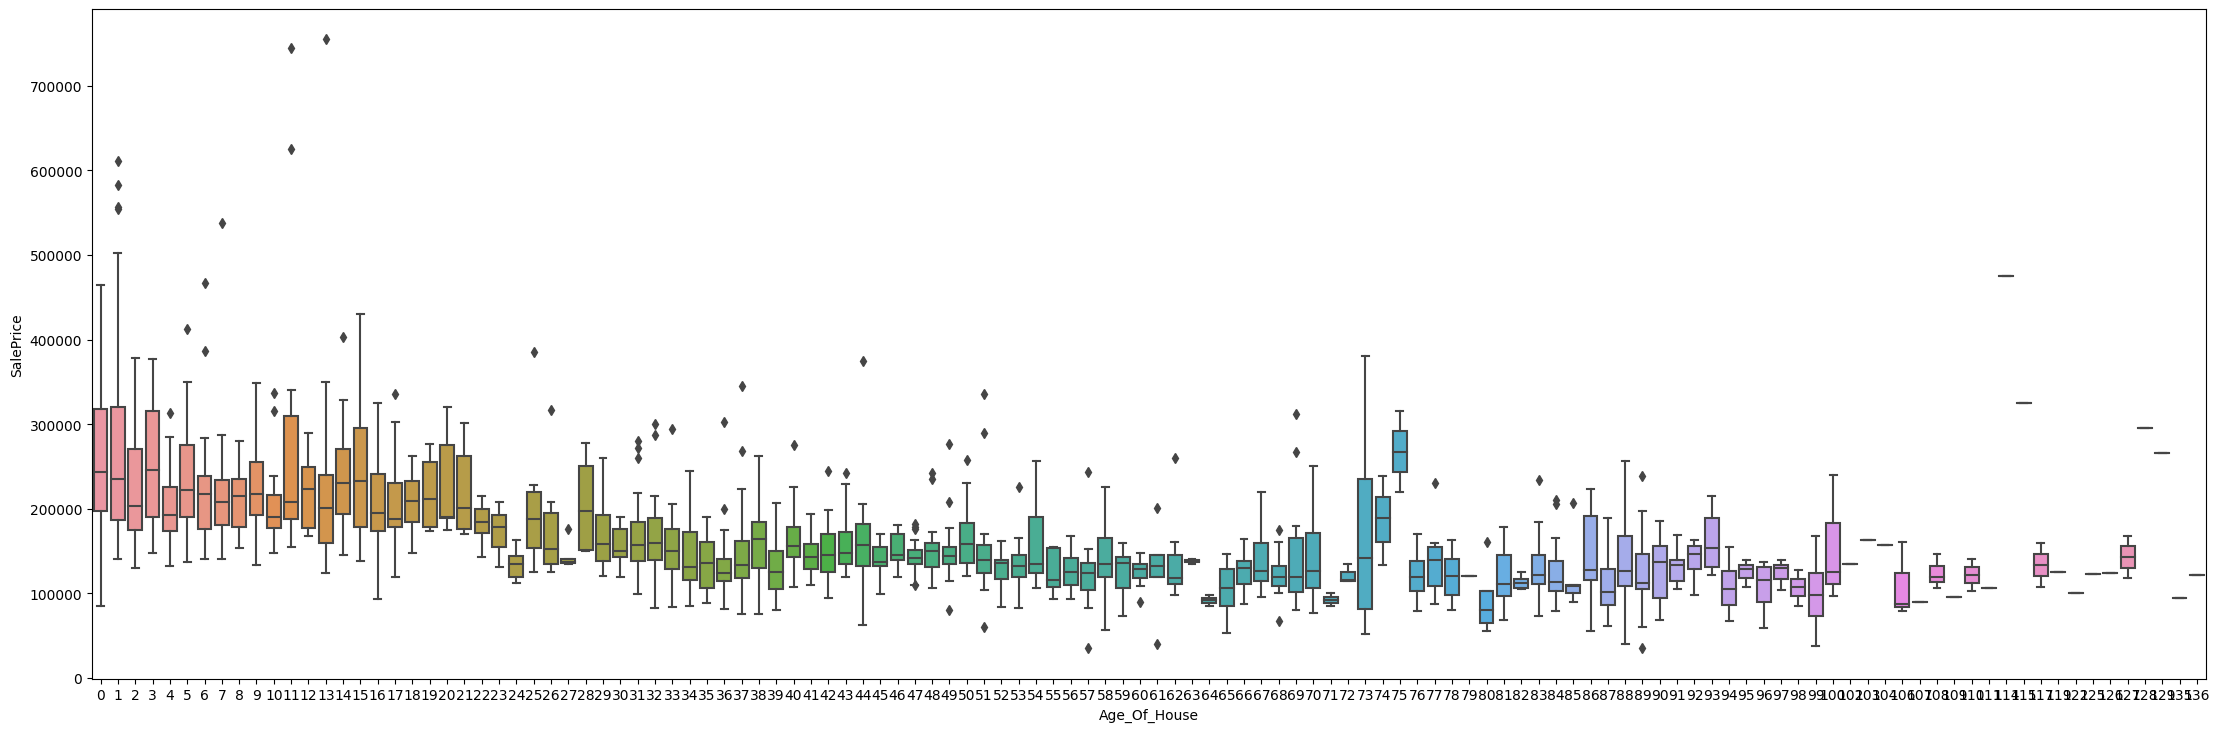

In [15]:
#Age of house vs Sale price
plt.figure(figsize=(60, 40))  
plt.subplot(4,2,1)
sns.boxplot(data=housing_df, x='Age_Of_House',y='SalePrice')
plt.show()    

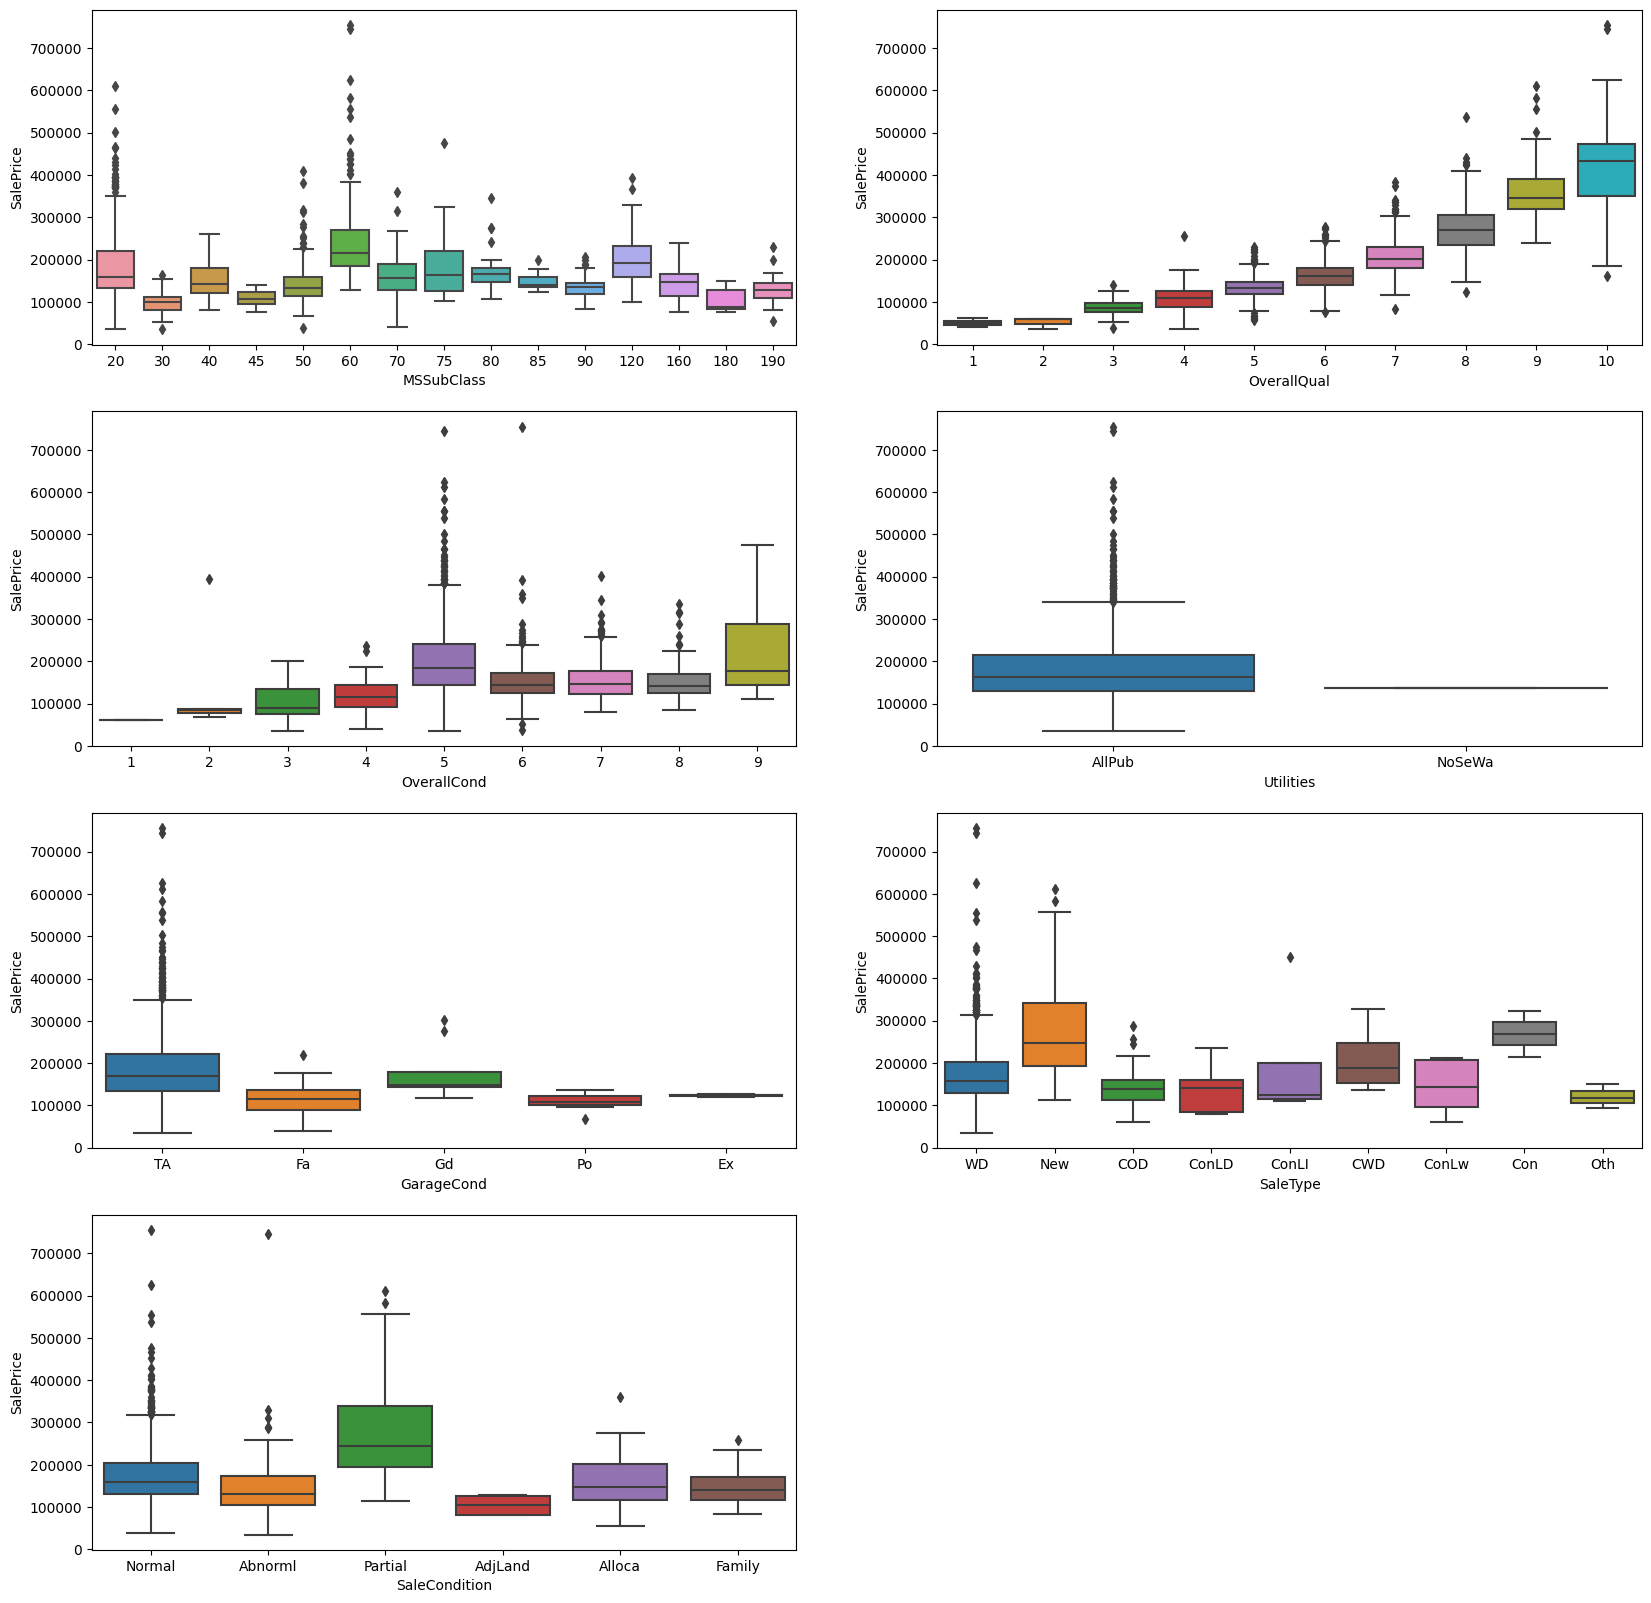

In [16]:
plt.figure(figsize=(20, 20))  
i=1

for column in sub_categorical_cols:

        plt.subplot(4,2,i)
        
        sns.boxplot(data=housing_df, x=column,y='SalePrice')
        i=i+1
plt.show()    

### Observations
  - Sale Price is high when the age of house is <2 years and decreases if the age of house increases
  - Sale Price is high when overall condition and quality are excellent/very excellent
  - Sale price is high for dwelling type 2-STORY 1946 & NEWER
  - Sale is high for  home  that is just constructed and new 

### Numerical Columns

We will use scatter plot to identify whether there any correlations between numeric features and we will drop columns that have numeric type

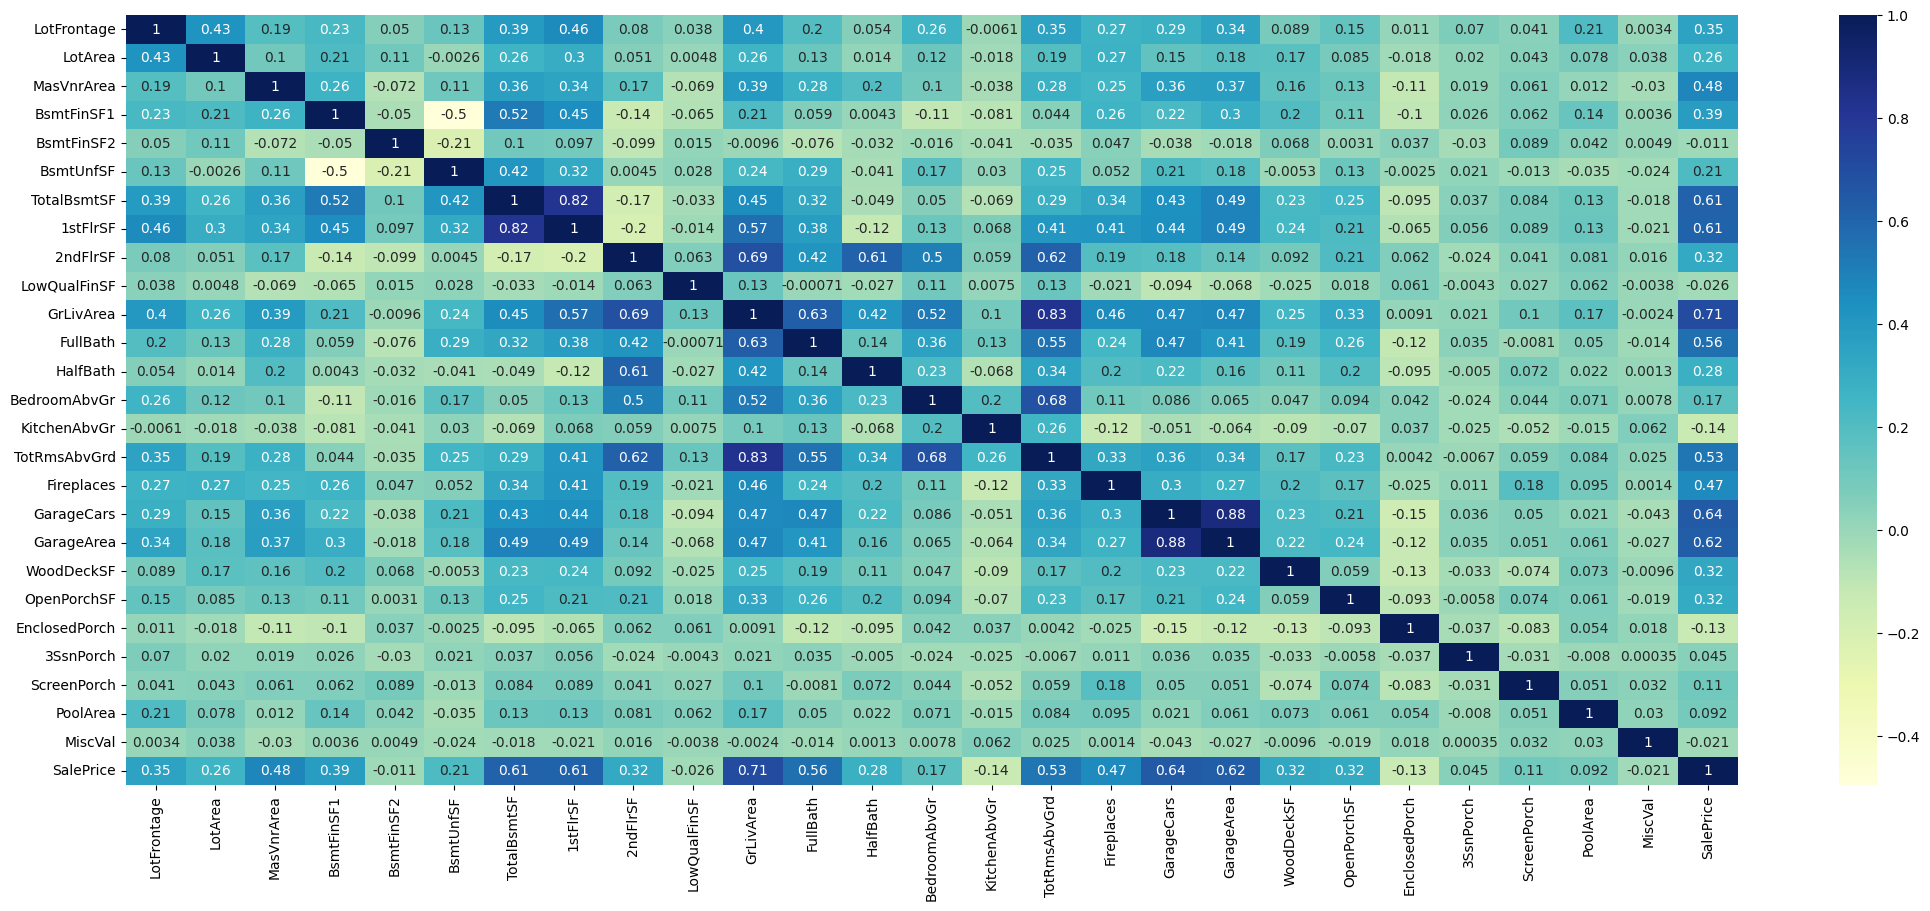

In [17]:
plt.figure(figsize = (26, 10))
sns.heatmap(house_numeric.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Observations 
- Living area square feet is highly correlated with sale price(sales price increases if living area square feet is more)
- Total Basement squarefeet ,size of Garrage ars ,Garrage Area is highly correlated with sale price
- Low quality finished ,Enclosed Porch area square feet has negative correlation with sale price
- 1st Floor Squarefeet and total basement square feet are multicollinear 
- Living area square feet and total rooms above grade are multicollinear

## Data Preparation 

### Missing Values treatment
-     Features PoolQC,MiscFeature,Alley,Fence,FireplaceQu has more missinng values we will drop these columns
-     GarageCond,GarageType,GarageFinish,GarageQual Indicates no garage so we will impute as none since no garrage we will update garageYrBlt as 0
-     BsmtExposure,BsmtFinType2,BsmtCond,BsmtQual,BsmtFinType1 Indicates no basement we will replace with No Basement
-     LotFrontage,MasVnrArea  These are related to distance and cannot be none  we will check if there are outliers if yes we will replace with median else mean to populate these values
-     MasVnrType,Electrical We will use mode to impute

In [18]:
housing_df.drop(['PoolQC', 'MiscFeature', 'Alley','Fence','FireplaceQu'],inplace=True,axis=1)

In [19]:
missing_categorical = ['GarageCond', 'GarageType', 'GarageFinish','GarageQual','BsmtExposure','BsmtFinType2','BsmtCond','BsmtQual','BsmtFinType1']
for variable in missing_categorical:
    housing_df[variable].fillna('None', inplace=True)
    
housing_df['GarageYrBlt'].fillna(0, inplace=True)


**As it has outliers we will replace missing values with median instead of mean**

<AxesSubplot: >

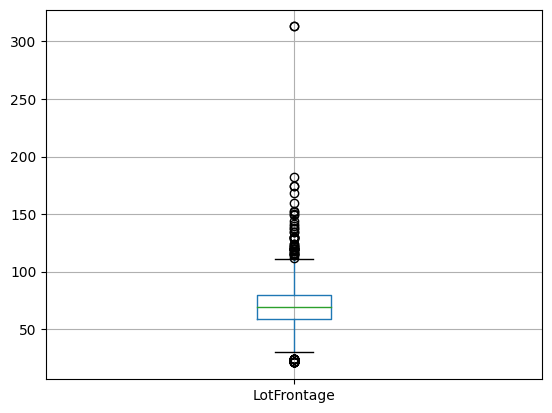

In [20]:
housing_df.boxplot(column='LotFrontage', return_type='axes')



In [21]:
housing_df['LotFrontage'].fillna(housing_df['LotFrontage'].median(), inplace=True)


<AxesSubplot: >

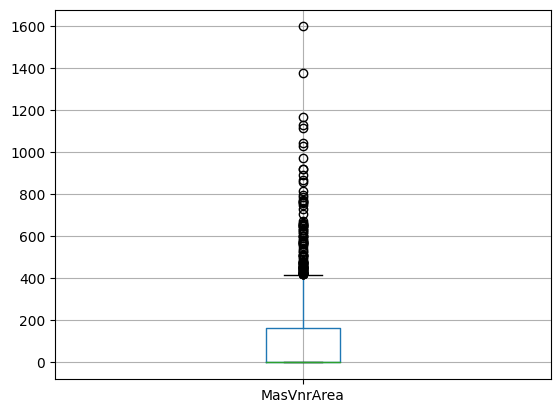

In [22]:
housing_df.boxplot(column='MasVnrArea', return_type='axes')


In [23]:
housing_df['MasVnrArea'].fillna(housing_df['MasVnrArea'].median(), inplace=True)


**We will use mode to impute these categorical variables**

In [24]:
missing_categorical_2 = ['MasVnrType','Electrical']
for variable in missing_categorical_2:
    housing_df[variable].fillna(housing_df[variable].mode()[0], inplace=True)

**No Further missing values after imputation**

In [25]:
missing_null_values = round(100*(housing_df.isnull().sum()/len(housing_df.index)),2).sort_values(ascending=False)
missing_null_values

MSSubClass       0.0
GarageYrBlt      0.0
Fireplaces       0.0
Functional       0.0
TotRmsAbvGrd     0.0
KitchenQual      0.0
KitchenAbvGr     0.0
BedroomAbvGr     0.0
HalfBath         0.0
FullBath         0.0
BsmtHalfBath     0.0
BsmtFullBath     0.0
GrLivArea        0.0
LowQualFinSF     0.0
2ndFlrSF         0.0
1stFlrSF         0.0
Electrical       0.0
GarageType       0.0
GarageFinish     0.0
MSZoning         0.0
GarageCars       0.0
SalePrice        0.0
SaleCondition    0.0
SaleType         0.0
MoSold           0.0
MiscVal          0.0
PoolArea         0.0
ScreenPorch      0.0
3SsnPorch        0.0
EnclosedPorch    0.0
OpenPorchSF      0.0
WoodDeckSF       0.0
PavedDrive       0.0
GarageCond       0.0
GarageQual       0.0
GarageArea       0.0
CentralAir       0.0
HeatingQC        0.0
Heating          0.0
TotalBsmtSF      0.0
OverallCond      0.0
OverallQual      0.0
HouseStyle       0.0
BldgType         0.0
Condition2       0.0
Condition1       0.0
Neighborhood     0.0
LandSlope    

**Create X for features and y with target variable**

In [26]:
X = housing_df.drop(['SalePrice'],axis=1)
y=housing_df['SalePrice']

### One Hot Encoding 

In [27]:
housing_categorical = X.select_dtypes(include=['object'])

In [28]:
housing_dummies = pd.get_dummies(housing_categorical, drop_first=True)
housing_dummies.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            0            1            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            0            0            1            0            1   
4            0            0            1            0            1   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             0             1                0                0   
1             0             0             1                0                0   
2             0             0             0                0                0   
3             0             0             0                0                0   
4             0             0             0                0                0   

   ...  SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  \
0  ...               0               0             0             0   
1  ...               0               0             0             0   
2  ...               0               0             0             0   
3  ...               0               0             0             0   
4  ...               0               0             0             0   

   SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
0            1                      0                     0   
1            1                      0                     0   
2            1                      0                     0   
3            1                      0                     0   
4            1                      0                     0   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
0                     0                     1                      0  
1                     0                     1                      0  
2                     0                     1                      0  
3                     0                     0                      0  
4                     0                     1                      0  

[5 rows x 205 columns]

In [29]:
X = X.drop(list(housing_categorical.columns), axis=1)

In [30]:
X = pd.concat([X, housing_dummies], axis=1)

## Model Building & Evaluation

In [31]:
# scale features
from sklearn.preprocessing import scale

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=240)

### Train-Test Split

In [32]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

### Ridge Regression

In [33]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [34]:
print(model_cv.best_params_)

{'alpha': 100}


### Observation 
- Optimum value of alpha from ridge is 500

In [35]:
alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-4.02149511e+03 -6.47609520e+02  4.25238404e+03  1.13312280e+04
  4.03173051e+03  3.00700285e+03  3.93579831e+03  1.87951370e+03
  1.01682906e+03  8.31293833e+02  3.16521804e+03  6.54223946e+03
  9.73436068e+03 -7.89520256e+02  1.28265224e+04  3.23546788e+03
  3.82326345e+02  4.18768945e+03  1.12752350e+03 -1.06296257e+03
 -2.61415534e+03  3.26248890e+03  2.60014299e+03 -3.43414456e+02
  6.69496309e+03  1.23899617e+03  1.46421262e+03  8.13585415e+02
  1.48081794e+02  1.00510170e+03  1.26854205e+03  1.46923145e+02
  3.17117654e+01 -2.22852087e+02 -3.39381665e+03  8.64445735e+02
  4.71711063e+02  2.11940612e+03  6.64923632e+02  1.38499205e+03
  7.86163104e+01 -2.61643679e+03  3.47409635e+02  2.04584293e+03
  6.42520983e+02  3.05165921e+03 -8.97488642e+02  2.63688888e+03
 -1.60353488e+03 -5.94524842e+02 -4.42300606e+02  9.18563385e+02
 -3.41979062e+02 -4.94566115e+00 -1.99815465e+02 -2.66603301e+02
 -1.64734371e+00 -7.32258143e+02  4.04780341e+03 -3.71347605e+03
 -1.10884171e+03 -1.03157

In [36]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

ridge_metrics = []
compute_and_display_metrics(y_train,y_pred_train,y_test,y_pred_test,ridge_metrics)

R2 Train : 0.9146140753807361
R2 Test : 0.8570010937403035
RSS Train : 544821866710.3761
RSS Test : 403072808900.59717
MSE Train : 533615932.13553
MSE. Test : 920257554.5675734


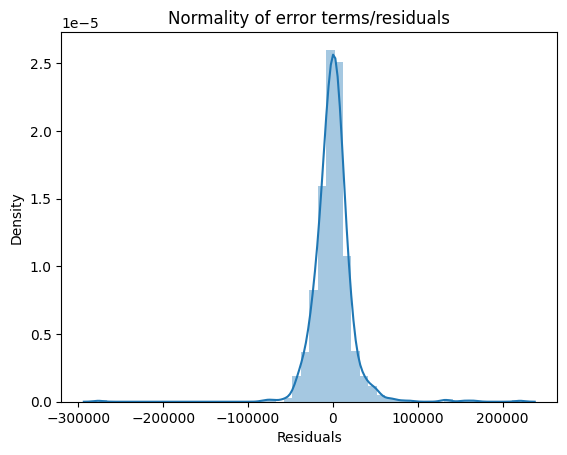

In [37]:
# Distribution of errors -- Normally distributed 
y_res=y_train- y_pred_train
p = sns.distplot(y_res,kde=True)

p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

### Lasso 

In [38]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [39]:
print(model_cv.best_params_)

{'alpha': 100}


### Observation 
- Optimum value of alpha from ridge is 500

In [40]:
alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=100)

In [41]:
lasso.coef_

array([-3.86550616e+03,  1.41299968e+03,  5.68765425e+03,  9.68149470e+03,
        6.31830862e+03,  2.47792877e+03,  3.71168622e+03,  6.24785418e+03,
        1.33343390e+03, -0.00000000e+00,  9.71957101e+03,  0.00000000e+00,
        7.05885317e+03, -2.58364039e+03,  3.03705880e+04,  1.53819050e+03,
       -1.76262278e+02,  9.00939295e+02, -1.06369153e+03, -3.00099626e+03,
       -3.49949797e+03, -0.00000000e+00,  7.16377503e+02, -0.00000000e+00,
        4.09696012e+03,  1.29299398e+03,  1.01289976e+03,  1.08124074e+03,
       -1.50587161e+02,  5.98033905e+02,  5.21214420e+02,  3.16154591e+03,
        1.46129270e+02, -3.52053427e+02, -1.10895074e+04,  3.29731978e+02,
        1.66213903e+02,  1.47879998e+03,  0.00000000e+00,  1.85455649e+03,
       -5.46380532e+00, -3.55302339e+02,  5.03771910e+02,  7.03065535e+02,
       -5.92038665e+02,  1.50412912e+03, -3.20502028e+02,  2.19047725e+03,
       -1.09898078e+03, -0.00000000e+00,  0.00000000e+00,  4.75425228e+02,
       -1.50662380e+03,  

In [42]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

lasso_metrics = []
compute_and_display_metrics(y_train,y_pred_train,y_test,y_pred_test,lasso_metrics)

R2 Train : 0.9465537842853391
R2 Test : 0.8368979301966506
RSS Train : 341024204447.1293
RSS Test : 459737847880.77356
MSE Train : 334009994.5613411
MSE. Test : 1049629789.6821314


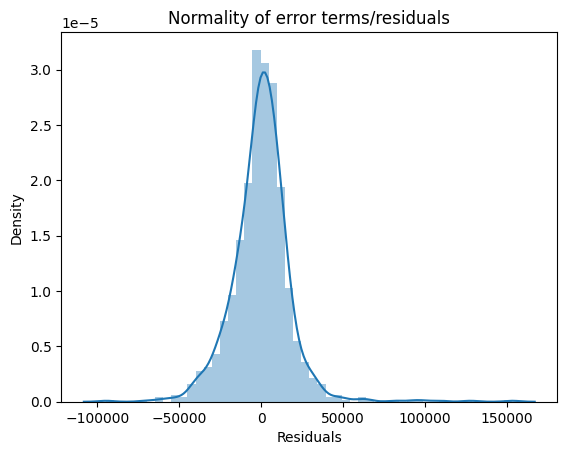

In [43]:
# Distribution of errors - Normally distributed 
y_res=y_train- y_pred_train
p = sns.distplot(y_res,kde=True)

p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

In [44]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)']
        #'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric'] )

rg_metric = pd.Series(ridge_metrics, name = 'Ridge Regression')
ls_metric = pd.Series(lasso_metrics, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric,rg_metric, ls_metric], axis = 1)

final_metric

Metric  Ridge Regression  Lasso Regression
0  R2 Score (Train)      9.146141e-01      9.465538e-01
1   R2 Score (Test)      8.570011e-01      8.368979e-01
2       RSS (Train)      5.448219e+11      3.410242e+11
3        RSS (Test)      4.030728e+11      4.597378e+11
4       MSE (Train)      2.310013e+04      1.827594e+04
5        MSE (Test)      3.033575e+04      3.239799e+04

### Coeffcients From lasso and ridge for various features

In [45]:
betas = pd.DataFrame(index=X.columns)

In [46]:
betas.rows = X.columns

In [47]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [48]:
pd.set_option('display.max_rows', None)
betas.head(68)

Ridge         Lasso
MSSubClass            -4021.495106  -3865.506165
LotFrontage            -647.609520   1412.999682
LotArea                4252.384039   5687.654253
OverallQual           11331.227959   9681.494695
OverallCond            4031.730513   6318.308617
YearRemodAdd           3007.002848   2477.928769
MasVnrArea             3935.798308   3711.686218
BsmtFinSF1             1879.513697   6247.854180
BsmtFinSF2             1016.829059   1333.433899
BsmtUnfSF               831.293833     -0.000000
TotalBsmtSF            3165.218042   9719.571010
1stFlrSF               6542.239459      0.000000
2ndFlrSF               9734.360684   7058.853169
LowQualFinSF           -789.520256  -2583.640386
GrLivArea             12826.522365  30370.588013
BsmtFullBath           3235.467883   1538.190503
BsmtHalfBath            382.326345   -176.262278
FullBath               4187.689446    900.939295
HalfBath               1127.523499  -1063.691534
BedroomAbvGr          -1062.962575  -3000.996264
KitchenAbvGr          -2614.155336  -3499.497965
TotRmsAbvGrd           3262.488896     -0.000000
Fireplaces             2600.142992    716.377503
GarageYrBlt            -343.414456     -0.000000
GarageCars             6694.963087   4096.960117
GarageArea             1238.996165   1292.993984
WoodDeckSF             1464.212624   1012.899757
OpenPorchSF             813.585415   1081.240742
EnclosedPorch           148.081794   -150.587161
3SsnPorch              1005.101702    598.033905
ScreenPorch            1268.542050    521.214420
PoolArea                146.923145   3161.545911
MiscVal                  31.711765    146.129270
MoSold                 -222.852087   -352.053427
Age_Of_House          -3393.816654 -11089.507350
MSZoning_FV             864.445735    329.731978
MSZoning_RH             471.711063    166.213903
MSZoning_RL            2119.406119   1478.799978
MSZoning_RM             664.923632      0.000000
Street_Pave            1384.992046   1854.556492
LotShape_IR2             78.616310     -5.463805
LotShape_IR3          -2616.436786   -355.302339
LotShape_Reg            347.409635    503.771910
LandContour_HLS        2045.842929    703.065535
LandContour_Low         642.520983   -592.038665
LandContour_Lvl        3051.659210   1504.129115
Utilities_NoSeWa       -897.488642   -320.502028
LotConfig_CulDSac      2636.888877   2190.477247
LotConfig_FR2         -1603.534875  -1098.980781
LotConfig_FR3          -594.524842     -0.000000
LotConfig_Inside       -442.300606      0.000000
LandSlope_Mod           918.563385    475.425228
LandSlope_Sev          -341.979062  -1506.623803
Neighborhood_Blueste     -4.945661    231.799798
Neighborhood_BrDale    -199.815465    212.576166
Neighborhood_BrkSide   -266.603301    914.920604
Neighborhood_ClearCr     -1.647344     -0.000000
Neighborhood_CollgCr   -732.258143      0.000000
Neighborhood_Crawfor   4047.803409   4641.147433
Neighborhood_Edwards  -3713.476048  -1714.134119
Neighborhood_Gilbert  -1108.841712    -59.131992
Neighborhood_IDOTRR   -1031.578989     25.348660
Neighborhood_MeadowV  -1058.216451     -0.000000
Neighborhood_Mitchel  -2610.469719  -2240.565919
Neighborhood_NAmes    -2433.249231  -1282.615821
Neighborhood_NPkVill    442.599259   1188.790846
Neighborhood_NWAmes   -1264.409202   -912.209073
Neighborhood_NoRidge   7060.512221   5455.482694

In [49]:
betas.sort_values(by=['Ridge'], ascending=False).head(5)

Ridge         Lasso
GrLivArea         12826.522365  30370.588013
OverallQual       11331.227959   9681.494695
RoofMatl_CompShg  10121.537993  82240.696359
2ndFlrSF           9734.360684   7058.853169
RoofMatl_WdShngl   9622.194499  43848.644432

In [51]:
betas.sort_values(by=['Lasso'], ascending=False).head(5)

Ridge         Lasso
RoofMatl_CompShg  10121.537993  82240.696359
RoofMatl_Tar&Grv   5195.104441  54138.550062
RoofMatl_WdShngl   9622.194499  43848.644432
RoofMatl_WdShake   3348.640904  35561.196667
GrLivArea         12826.522365  30370.588013

**Features Eliminated by lasso**

In [557]:
count = (betas['Lasso'] == 0).sum()
count

58

## Conclusion
   - Model Accuracy for ridge & lasso are almost similar (based on the test metrics )
   - Alpha value turned out to be same for both regularizations
   - Lasso model seems to be better as it is less complex without much dip in accuracy
   - Residuals in both the cases are normally distributed

## Subjective Question Execution 

In [437]:
alpha =200

lasso_new = Lasso(alpha=alpha)
        
lasso_new.fit(X_train, y_train)

Lasso(alpha=200)

In [438]:
y_pred_train = lasso_new.predict(X_train)
y_pred_test = lasso_new.predict(X_test)

lasso_metrics_new = []
compute_and_display_metrics(y_train,y_pred_train,y_test,y_pred_test,lasso_metrics_new)

R2 Train : 0.9426262253148068
R2 Test : 0.841531156164568
RSS Train : 366084775255.2801
RSS Test : 446678115789.0603
MSE Train : 358555117.781861
MSE. Test : 1019813049.746713


In [439]:
alpha = 200
ridge_new = Ridge(alpha=alpha)

ridge_new.fit(X_train, y_train)

Ridge(alpha=200)

In [440]:
y_pred_train = ridge_new.predict(X_train)
y_pred_test = ridge_new.predict(X_test)

ridge_metrics_new = []
compute_and_display_metrics(y_train,y_pred_train,y_test,y_pred_test,ridge_metrics_new)

R2 Train : 0.9040967895404218
R2 Test : 0.8598782474482898
RSS Train : 611929499845.427
RSS Test : 394962939692.1526
MSE Train : 599343290.7398894
MSE. Test : 901741871.4432708


In [441]:
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)']
        #'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric'] )

rg_metric = pd.Series(ridge_metrics, name = 'Ridge Regression')
ls_metric = pd.Series(lasso_metrics, name = 'Lasso Regression')
rgn_metric = pd.Series(ridge_metrics_new, name = 'Ridge Regression New')
lsn_metric = pd.Series(lasso_metrics_new, name = 'Lasso Regression New ')

final_metric = pd.concat([lr_metric,rg_metric, ls_metric,rgn_metric,lsn_metric], axis = 1)

final_metric

Metric  Ridge Regression  Lasso Regression  Ridge Regression New  \
0  R2 Score (Train)      9.146141e-01      9.465538e-01          9.040968e-01   
1   R2 Score (Test)      8.570011e-01      8.368979e-01          8.598782e-01   
2       RSS (Train)      5.448219e+11      3.410242e+11          6.119295e+11   
3        RSS (Test)      4.030728e+11      4.597378e+11          3.949629e+11   
4       MSE (Train)      2.310013e+04      1.827594e+04          2.448149e+04   
5        MSE (Test)      3.033575e+04      3.239799e+04          3.002902e+04   

   Lasso Regression New   
0           9.426262e-01  
1           8.415312e-01  
2           3.660848e+11  
3           4.466781e+11  
4           1.893555e+04  
5           3.193451e+04

In [442]:
betas1 = pd.DataFrame(index=X.columns)
betas1.rows = X.columns
betas1['Ridge'] = ridge_new.coef_
betas1['Lasso'] = lasso_new.coef_

In [443]:
betas1.sort_values(by=['Ridge'], ascending=False).head(5)

Ridge         Lasso
GrLivArea             10612.329135  29879.664949
OverallQual           10558.789839  10631.243055
2ndFlrSF               7391.216981   5060.150885
RoofMatl_WdShngl       7261.666337  37206.353835
Neighborhood_NoRidge   6861.179615   5808.360043

In [444]:
betas1.sort_values(by=['Lasso'], ascending=False).head(10)

Ridge         Lasso
RoofMatl_CompShg   5258.499961  68283.481746
RoofMatl_Tar&Grv   2161.381557  44484.999163
RoofMatl_WdShngl   7261.666337  37206.353835
GrLivArea         10612.329135  29879.664949
RoofMatl_WdShake   1604.431693  29441.353729
RoofMatl_Membran   1396.102823  14591.489426
RoofMatl_Metal      824.768747  13677.942392
RoofMatl_Roll      1008.019400  13339.694079
OverallQual       10558.789839  10631.243055
TotalBsmtSF        3477.170812   8592.236810

In [445]:
count = (betas1['Lasso'] == 0).sum()
count

78

In [446]:
alpha =100

lasso_new_1 = Lasso(alpha=alpha)
        
X_train_new =  X_train.drop(['RoofMatl_CompShg','RoofMatl_Tar&Grv','RoofMatl_WdShngl','RoofMatl_WdShake','GrLivArea'],axis=1)
X_test_new =X_test.drop(['RoofMatl_CompShg','RoofMatl_Tar&Grv','RoofMatl_WdShngl','RoofMatl_WdShake','GrLivArea'],axis=1)
lasso_new_1.fit(X_train_new, y_train)

Lasso(alpha=100)

In [447]:
y_pred_train = lasso_new_1.predict(X_train_new)
y_pred_test = lasso_new_1.predict(X_test_new)

lasso_metrics_new_1 = []
compute_and_display_metrics(y_train,y_pred_train,y_test,y_pred_test,lasso_metrics_new_1)

R2 Train : 0.9124552008373444
R2 Test : 0.8335941056812859
RSS Train : 558596994917.6172
RSS Test : 469050379440.31055
MSE Train : 547107732.5343949
MSE. Test : 1070891277.260983


In [450]:
betas2 = pd.DataFrame(index=X_train_new.columns)
betas2.rows = X_train_new.columns
betas2['Lasso'] = lasso_new_1.coef_

In [451]:
betas2.sort_values(by=['Lasso'], ascending=False).head(10)

Lasso
2ndFlrSF              33054.595440
1stFlrSF              20130.365850
OverallQual           12800.323079
GarageCars            10696.589618
Neighborhood_NoRidge   7672.979178
HouseStyle_1Story      7135.770593
Neighborhood_NridgHt   6591.723430
LotArea                6566.077528
Neighborhood_Somerst   5524.853418
BsmtExposure_Gd        5451.209557

In [452]:
count = (betas2['Lasso'] == 0).sum()
count

48